# Srovnání modelů na klasifikaci fotek prostředí

Pro analýzu jsem si vybral dataset https://www.kaggle.com/datasets/puneet6060/intel-image-classification


In [3]:
# Importy
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.discriminant_analysis import StandardScaler
import tensorflow as tf
from keras import models, layers
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Rozbor datasetu

## Načtení dat ze souborů

In [4]:
# Inicializace proměnných
seg_train = Path.cwd() / "seg_train"
seg_test = Path.cwd() / "seg_test"
x_train = []
y_train = []
x_test = []
y_test = []
img_size = (32, 32)
categories = ["buildings", "forest", "glacier", "mountain", "sea", "street"]


# Čtení dat ze souborů
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(seg_train, category)):
        img_path = os.path.join(seg_train, category, file)
        img = imread(img_path)
        x_train.append(img)
        y_train.append(category_idx)
    for file in os.listdir(os.path.join(seg_test, category)):
        img_path = os.path.join(seg_test, category, file)
        img = imread(img_path)
        x_test.append(img)
        y_test.append(category_idx)

## Analýza datasetu

V další buňce lze vidět že data jsou relativně rovnoměrně rozdělena, díky tomu je možné bezpečně trénovat model.

In [5]:
print(
    f"""
Počet trénovacích fotek: {len(x_train)}     
Počet testovacích fotek: {len(x_test)}              
Struktura každé fotky: {x_train[0].shape}

Počet výskytů v každé kategorii: {np.unique(y_train, return_counts=True)[1]}
Počet výskytů v každé kategorii: {np.unique(y_test, return_counts=True)[1]}
"""
)


Počet trénovacích fotek: 14034     
Počet testovacích fotek: 3000              
Struktura každé fotky: (150, 150, 3)

Počet výskytů v každé kategorii: [2191 2271 2404 2512 2274 2382]
Počet výskytů v každé kategorii: [437 474 553 525 510 501]



## Ukázka fotek z datasetu

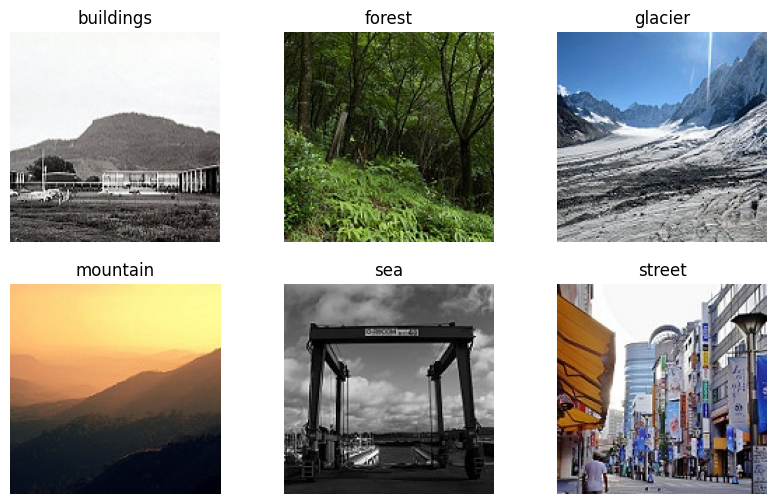

In [6]:
plt.figure(figsize=(10, len(category)))
for category_idx, category in enumerate(categories):
    img_index = y_train.index(category_idx)
    plt.subplot(2,3,category_idx+1)
    plt.imshow(x_train[img_index])
    plt.axis("off")
    plt.title(category)
plt.show()  

# Porovnání klasifikátorů

Nejprve je potřeba fotky zmenšit na 32x32 pixelů. Tento krok je převážně kvůli rychlosti trénování modelu, trénování s takovým množstvím fotek s velikostí 150x150 pixelů by nebylo možné v domácích podmínkách.

In [20]:
""" 
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    print(classification_report(y_test, y_pred, target_names=categories))

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(categories))
    plt.xticks(tick_marks, categories, rotation=45)
    plt.yticks(tick_marks, categories)
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show() 
"""

x_train_models = []
x_test_models = []

for img in x_train:
    resized_img = resize(img, img_size)
    x_train_models.append(resized_img.flatten())

for img in x_test:
    resized_img = resize(img, img_size)
    x_test_models.append(resized_img.flatten())
print(x_train_models)
x_train_models = np.asarray(x_train_models)
y_train_models = np.asarray(y_train)
x_test_models = np.asarray(x_test_models)
y_test_models = np.asarray(y_test)

""" 
classifiers = [

    SVC(gamma=0.001),

    #DecisionTreeClassifier(max_depth=12),

    RandomForestClassifier(),

    ]


for classifier in classifiers:
    classifier.fit(x_train_svc, y_train_svc)
    y_pred_svc = classifier.predict(x_test_svc)

    #plot_confusion_matrix(y_test_svc, y_pred_svc) 
"""

[array([0.96828486, 0.96991551, 0.96126549, ..., 0.22263789, 0.20303005,
       0.19126307]), array([0.29679148, 0.48139954, 0.71661429, ..., 0.26375463, 0.20653521,
       0.15472347]), array([0.51316424, 0.75867133, 0.95560267, ..., 0.49994742, 0.5894489 ,
       0.20784416]), array([0.74899058, 0.63910797, 0.74432312, ..., 0.94588765, 0.87365634,
       0.93866477]), array([0.00438769, 0.13422918, 0.24095334, ..., 0.811522  , 0.82123695,
       0.77296716]), array([0.91267748, 0.91701855, 0.88017625, ..., 0.03580098, 0.04416553,
       0.08714112]), array([0.39256128, 0.52197305, 0.73373775, ..., 0.59243545, 0.57296512,
       0.55598309]), array([0.53234542, 0.77313046, 0.88998491, ..., 0.24909538, 0.33187431,
       0.35913886]), array([0.96631293, 0.9702345 , 0.97955489, ..., 0.33003003, 0.38980438,
       0.33223991]), array([0.63512242, 0.76126722, 0.87346169, ..., 0.55465743, 0.45094095,
       0.34046214]), array([0.97221686, 0.97221686, 0.97221686, ..., 0.71283538, 0.5850547

' \nclassifiers = [\n\n    SVC(gamma=0.001),\n\n    #DecisionTreeClassifier(max_depth=12),\n\n    RandomForestClassifier(),\n\n    ]\n\n\nfor classifier in classifiers:\n    classifier.fit(x_train_svc, y_train_svc)\n    y_pred_svc = classifier.predict(x_test_svc)\n\n    #plot_confusion_matrix(y_test_svc, y_pred_svc) \n'

In [ ]:

x_train_nn = np.asarray(x_train)
x_test_nn = np.asarray(x_test)
y_train_nn = tf.keras.utils.to_categorical(y_train, len(categories))
y_test_nn = tf.keras.utils.to_categorical(y_test, len(categories))

model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(units = 1024, activation="relu"),
    layers.Dense(units = 512, activation="relu"),
    layers.Dense(len(categories), activation="softmax")
])
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    x_train_nn, y_train_nn, epochs=30, validation_data=(x_test_nn, y_test_nn)
)
y_pred_nn = model.predict(x_test_nn)


y_pred_nn = np.argmax(y_pred_nn, axis=1)
y_test_nn = np.argmax(y_test_nn, axis=1)
plot_confusion_matrix(y_pred_nn, y_test_nn)

In [ ]:

plt.rcParams["figure.figsize"] = [12, 4]
figure, axis = plt.subplots(1, 2)
axis[0].plot(history.history["loss"], label="loss - training data")
axis[0].plot(history.history["val_loss"], label="loss - validating data")
axis[0].grid()
axis[0].set_title("Loss")
axis[0].legend()


axis[1].plot(history.history["accuracy"], label="accuracy - training data")
axis[1].plot(history.history["val_accuracy"], label="accuracy - validating data")
axis[1].grid()
axis[1].set_title("Accuracy")
axis[1].legend()